In [13]:

import numpy as np
import math
import matplotlib.pyplot as plt
#Initialize transformation matrix for predictions
#bm, br, bl, tr, tl
print('bm', 'br', 'bl', 'tr', 'tl')
T_expected_narrow = np.reshape([.5, 0, 0, .25, .25, 
                                0, 0, .75, .25, 0, 
                                0, .75, 0, 0, .25, 
                                .25, .25, 0, 0, .5, 
                                .25, 0, .25, .5, 0], (5, 5))
print(T_expected_narrow)
T_eb = np.vstack([T_expected_narrow[0], 
                             (T_expected_narrow[1] + T_expected_narrow[2]) , 
                             (T_expected_narrow[3] + T_expected_narrow[4])])
T_expected_broad = np.column_stack([T_eb[:, 0], 
                             (T_eb[:, 1]+ T_eb[:, 2]), 
                             (T_eb[:, 3]+ T_eb[:, 4])])
T_expected_broad_norm  = np.vstack([T_expected_broad[0]/np.sum(T_expected_broad[0]), 
                              T_expected_broad[1]/np.sum(T_expected_broad[1]), 
                              T_expected_broad[2]/np.sum(T_expected_broad[2])])
print('bm', 'b', 't')
print(T_expected_broad, np.sum(T_expected_broad, axis = 0), np.sum(T_expected_broad, axis = 1))
print(T_expected_broad_norm, np.sum(T_expected_broad_norm, axis = 0), np.sum(T_expected_broad_norm, axis = 1))

bm br bl tr tl
[[0.5  0.   0.   0.25 0.25]
 [0.   0.   0.75 0.25 0.  ]
 [0.   0.75 0.   0.   0.25]
 [0.25 0.25 0.   0.   0.5 ]
 [0.25 0.   0.25 0.5  0.  ]]
bm b t
[[0.5 0.  0.5]
 [0.  1.5 0.5]
 [0.5 0.5 1. ]] [1. 2. 2.] [1. 2. 2.]
[[0.5  0.   0.5 ]
 [0.   0.75 0.25]
 [0.25 0.25 0.5 ]] [0.75 1.   1.25] [1. 1. 1.]


In [14]:
# np.linalg expects a right matrix but I created a left matrix above, so I use the transpose for the eigenvalue calculation
eigvals, eigvecs = np.linalg.eig(T_expected_narrow.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = eigvec_one / eigvec_one[0]
print("Eigenvector for eigenvalue 1")
print(evec_one)

Eigenvector for eigenvalue 1
[1. 1. 1. 1. 1.]


In [15]:
# np.linalg expects a right matrix but I created a left matrix above, so I use the transpose for the eigenvalue calculation
eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = eigvec_one / eigvec_one[0]
print("Eigenvector for eigenvalue 1")
print(evec_one)

Eigenvector for eigenvalue 1
[1. 2. 2.]


In [16]:
#narrow observations array
T_ob = np.asarray([[8.09031044, 1.31702728, 1.41110066, 2.82220132, 3.01034807],
 [3.66886171, 7.05550329, 6.67920978, 3.76293509, 1.97554092],
 [2.16368768, 6.02069614, 8.46660395, 3.19849483, 3.19849483],
 [4.60959548, 2.0696143,  3.95108184, 4.32737535, 3.95108184],
 [4.1392286,  2.72812794, 2.91627469, 3.2925682,  5.17403575]])
T_ob_norm = np.vstack([T_ob[i]/np.sum(T_ob[i]) for i in range(len(T_ob))])
print(T_ob, '\n', np.around(T_ob_norm, 2), np.sum(T_ob_norm, axis = 1), np.sum(T_ob_norm, axis = 0))
eigvals, eigvecs = np.linalg.eig(T_ob_norm.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = np.around(eigvec_one*100 / np.sum(eigvec_one), 1)
print("\nEigenvector for eigenvalue 1 of T_ob_norm:")
print(evec_one)

[[8.09031044 1.31702728 1.41110066 2.82220132 3.01034807]
 [3.66886171 7.05550329 6.67920978 3.76293509 1.97554092]
 [2.16368768 6.02069614 8.46660395 3.19849483 3.19849483]
 [4.60959548 2.0696143  3.95108184 4.32737535 3.95108184]
 [4.1392286  2.72812794 2.91627469 3.2925682  5.17403575]] 
 [[0.49 0.08 0.08 0.17 0.18]
 [0.16 0.3  0.29 0.16 0.09]
 [0.09 0.26 0.37 0.14 0.14]
 [0.24 0.11 0.21 0.23 0.21]
 [0.23 0.15 0.16 0.18 0.28]] [1. 1. 1. 1. 1.] [1.20887506 0.90413586 1.10945963 0.88013675 0.8973927 ]

Eigenvector for eigenvalue 1 of T_ob_norm:
[25.5-0.j 17.6-0.j 21.7-0.j 17.4-0.j 17.8-0.j]


c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


In [17]:
# Impossible transitions - where none was predicted, but it happened -> the transition happened by breaking off, not by moving along surface
impossible = np.zeros((5,5))
impossible[T_expected_narrow == 0] = T_ob_norm[T_expected_narrow == 0]
#impossible[T_expected_narrow != 0] = 0
print(np.around(impossible,2))

[[0.   0.08 0.08 0.   0.  ]
 [0.16 0.3  0.   0.   0.09]
 [0.09 0.   0.37 0.14 0.  ]
 [0.   0.   0.21 0.23 0.  ]
 [0.   0.15 0.   0.   0.28]]


In [18]:
#broad observations array
T_obb = np.asarray([[8.09031044, 1.31702728, 1.41110066, 2.82220132, 3.01034807],
 [3.66886171, 7.05550329, 6.67920978, 3.76293509, 1.97554092],
 [2.16368768, 6.02069614, 8.46660395, 3.19849483, 3.19849483],
 [4.60959548, 2.0696143,  3.95108184, 4.32737535, 3.95108184],
 [4.1392286,  2.72812794, 2.91627469, 3.2925682,  5.17403575]])
T_eb = np.vstack([T_obb[0], 
                             (T_obb[1] + T_obb[2]) , 
                             (T_obb[3] + T_obb[4])])
T_obb = np.column_stack([T_eb[:, 0], 
                             (T_eb[:, 1]+ T_eb[:, 2]), 
                             (T_eb[:, 3]+ T_eb[:, 4])])
T_obb_norm = np.vstack([T_obb[i]/np.sum(T_obb[i]) for i in range(len(T_obb))])
print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = np.around(eigvec_one*100 / np.sum(eigvec_one), 1)
print("Eigenvector for eigenvalue 1 of T_obb_norm:")
print(evec_one, eigvec_one, eigvecs, eigvals)

[[ 8.09031044  2.72812794  5.83254939]
 [ 5.83254939 28.22201316 12.13546567]
 [ 8.74882408 11.66509877 16.74506114]] 
 [[0.49 0.16 0.35]
 [0.13 0.61 0.26]
 [0.24 0.31 0.45]] [1. 1. 1.]
Eigenvector for eigenvalue 1 of T_obb_norm:
[25.7 39.2 35.1] [-0.43898959 -0.66895335 -0.5998246 ] [[-0.43898959 -0.56437202 -0.41274241]
 [-0.66895335  0.79317834 -0.40373762]
 [-0.5998246  -0.22880632  0.81648003]] [1.         0.40386228 0.1436443 ]


In [19]:
# Impossible transitions - where none was predicted, but it happened -> the transition happened by breaking off, not by moving along surface
impossible = np.zeros((3,3))
impossible[T_expected_broad == 0] = T_obb[T_expected_broad == 0]
#impossible[T_expected_narrow != 0] = 0
print(impossible)



[[0.         2.72812794 0.        ]
 [5.83254939 0.         0.        ]
 [0.         0.         0.        ]]



TRANSITION THRESHOLD  5

TRANSITION THRESHOLD  8

TRANSITION THRESHOLD  10

TRANSITION THRESHOLD  19

TRANSITION THRESHOLD  27

TRANSITION THRESHOLD  38

TRANSITION THRESHOLD  52

TRANSITION THRESHOLD  60


Text(0, 0.5, 'observed probability of transition')

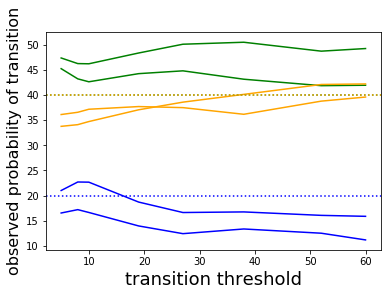

In [20]:
#broad observations array
trans_runs= np.load('trans_runs.npy')[()]
num_top_keys = 4
num_full_keys = 6
num_tran_keys = 5
trans_threshes = [5, 8, 10, 19, 27, 38, 52, 60]
sides = {"bm":[], "b":[], "t":[], "ucf":[]}
classes = {"bm":[], "br":[], "bl":[], "tr":[], "tl":[], "ucf":[]}
transitions = {"bm->bm" :[], "bm->br":[], "bm->bl":[], "bm->tr":[], "bm->tl":[],
              "br->bm" :[], "br->br":[], "br->bl":[], "br->tr":[], "br->tl":[],
              "bl->bm" :[], "bl->br":[], "bl->bl":[], "bl->tr":[], "bl->tl":[],
              "tr->bm" :[], "tr->br":[], "tr->bl":[], "tr->tr":[], "tr->tl":[],
              "tl->bm" :[], "tl->br":[], "tl->bl":[], "tl->tr":[], "tl->tl":[]}

skeys = list(sides.keys())
ckeys = list(classes.keys())
x1 = []
x2 = []
x3 = []
xa1 = []
xa2 = []
xa3 = []
for trans_fil in trans_threshes:
    print("\nTRANSITION THRESHOLD ", trans_fil)
    
    Top_bottoms, Full_classif, N_transitions = trans_runs[trans_fil]
    #Top_bottoms, Full_classif, N_transitions, trans_threshes, num_top_keys, num_full_keys, num_tran_keys, skeys, ckeys, num_tran_keys, num_total_frames = trans_runs[trans_fil]
    sums = np.sum
    Tb_sums = [sums(Top_bottoms[:, c]) for c in range(num_top_keys)]
    Fc_sums = [sums(Full_classif[:, c]) for c in range(num_full_keys)]
    Nt_sums = sums(N_transitions, axis = 0)#[sums(N_transitions[:, c]) for c in range(num_tran_keys)]
    T_obb = Nt_sums*100/np.sum(Nt_sums) #percs not sums
    T_eb = np.vstack([T_obb[0], 
                                 (T_obb[1] + T_obb[2]) , 
                                 (T_obb[3] + T_obb[4])])
    T_obb = np.column_stack([T_eb[:, 0], 
                                 (T_eb[:, 1]+ T_eb[:, 2]), 
                                 (T_eb[:, 3]+ T_eb[:, 4])])
    to_sums = np.sum(T_obb, axis = 0)
    from_sums = np.sum(T_obb, axis = 1)
    #print("Eigenvector for eigenvalue 1 of T_obb_norm:")
    #print(evec_one, eigvec_one, eigvecs, eigvals)
    x1.append(to_sums[0])
    x2.append(to_sums[1])
    x3.append(to_sums[2])
    xa1.append(from_sums[0])
    xa2.append(from_sums[1])
    xa3.append(from_sums[2])
plt.plot(trans_threshes, x1, c = 'blue', ls = '-')
plt.plot(trans_threshes, x2, c = 'green', ls = '-')
plt.plot(trans_threshes, x3, c = 'orange', ls = '-')
plt.plot(trans_threshes, xa1, c = 'blue', ls = '-')
plt.plot(trans_threshes, xa2, c = 'green', ls = '-')
plt.plot(trans_threshes, xa3, c = 'orange', ls = '-')

plt.axhline(y=(20), c = 'blue', ls = ':')
plt.axhline(y=(40), c = 'green', ls = ':')
plt.axhline(y=(40), c = 'orange', ls = ':')
plt.xlabel('transition threshold', fontsize=18)
plt.ylabel('observed probability of transition', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')

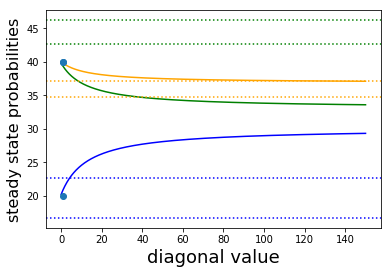

In [21]:
"tESTING HYPOTHESIS WITH all positions possible in a swing"
#narrow observations array
alphas = np.linspace(0, 150, num=1000)
x1 = []
x2 = []
x3 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    T_expected_narrow = np.asarray([[i, 1.31702728, 1.41110066, 2.82220132, 3.01034807],
 [3.66886171, i, 6.67920978, 3.76293509, 1.97554092],
 [2.16368768, 6.02069614, i, 3.19849483, 3.19849483],
 [4.60959548, 2.0696143,  3.95108184, i, 3.95108184],
 [4.1392286,  2.72812794, 2.91627469, 3.2925682,  i]])
    T_eb = np.vstack([T_expected_narrow[0], 
                             (T_expected_narrow[1] + T_expected_narrow[2]) , 
                             (T_expected_narrow[3] + T_expected_narrow[4])])
    T_expected_broad = np.column_stack([T_eb[:, 0], 
                                 (T_eb[:, 1]+ T_eb[:, 2]), 
                                 (T_eb[:, 3]+ T_eb[:, 4])])
    T_expected_broad_norm  = np.vstack([T_expected_broad[0]/np.sum(T_expected_broad[0]), 
                                  T_expected_broad[1]/np.sum(T_expected_broad[1]), 
                                  T_expected_broad[2]/np.sum(T_expected_broad[2])])
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
    x3.append(evec_one[2])
plt.plot(alphas, x1, c = 'blue', ls = '-')
plt.plot(alphas, x2, c = 'green', ls = '-')
plt.plot(alphas, x3, c = 'orange', ls = '-')

plt.axhline(y=(22.7), c = 'blue', ls = ':')
plt.axhline(y=(42.6), c = 'green', ls = ':')
plt.axhline(y=(34.7), c = 'orange', ls = ':')
plt.axhline(y=(16.7), c = 'blue', ls = ':')
plt.axhline(y=(46.2), c = 'green', ls = ':')
plt.axhline(y=(37.2), c = 'orange', ls = ':')
plt.xlabel('diagonal value', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1, 1),(20, 40, 40), 'o')

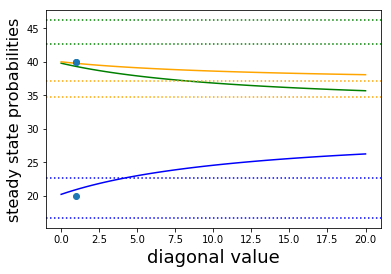

In [22]:
"tESTING HYPOTHESIS WITH all positions possible in a swing"
#narrow observations array
alphas = np.linspace(0, 20, num=50)
x1 = []
x2 = []
x3 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    T_expected_narrow = np.asarray([[i, 1.31702728, 1.41110066, 2.82220132, 3.01034807],
 [3.66886171, i, 6.67920978, 3.76293509, 1.97554092],
 [2.16368768, 6.02069614, i, 3.19849483, 3.19849483],
 [4.60959548, 2.0696143,  3.95108184, i, 3.95108184],
 [4.1392286,  2.72812794, 2.91627469, 3.2925682,  i]])
    T_eb = np.vstack([T_expected_narrow[0], 
                             (T_expected_narrow[1] + T_expected_narrow[2]) , 
                             (T_expected_narrow[3] + T_expected_narrow[4])])
    T_expected_broad = np.column_stack([T_eb[:, 0], 
                                 (T_eb[:, 1]+ T_eb[:, 2]), 
                                 (T_eb[:, 3]+ T_eb[:, 4])])
    T_expected_broad_norm  = np.vstack([T_expected_broad[0]/np.sum(T_expected_broad[0]), 
                                  T_expected_broad[1]/np.sum(T_expected_broad[1]), 
                                  T_expected_broad[2]/np.sum(T_expected_broad[2])])
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one[0])
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
    x3.append(evec_one[2])
plt.plot(alphas, x1, c = 'blue', ls = '-')
plt.plot(alphas, x2, c = 'green', ls = '-')
plt.plot(alphas, x3, c = 'orange', ls = '-')

plt.axhline(y=(22.7), c = 'blue', ls = ':')
plt.axhline(y=(42.6), c = 'green', ls = ':')
plt.axhline(y=(34.7), c = 'orange', ls = ':')
plt.axhline(y=(16.7), c = 'blue', ls = ':')
plt.axhline(y=(46.2), c = 'green', ls = ':')
plt.axhline(y=(37.2), c = 'orange', ls = ':')
plt.xlabel('diagonal value', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1, 1),(20, 40, 40), 'o')

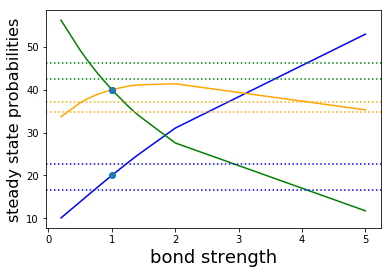

In [23]:
"tESTING HYPOTHESIS WITH all positions possible in a swing"
#narrow observations array
alphas = [0.2, 0.5, 0.6, 0.7, 0.8, 1, 1.25, 1.3, 1.4, 2, 5]
x1 = []
x2 = []
x3 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    T_expected_narrow = np.asarray([[4*i+4, 0, 0, 4,4],
     [0, 5+i,5+i, i+1, i+1],
     [0, 5+i,5+i, i+1, i+1],
     [2*i+2, 2, 2, 3+i, 3+i],
     [2*i+2, 2, 2, 3+i, 3+i]])
    T_eb = np.vstack([T_expected_narrow[0], 
                             (T_expected_narrow[1] + T_expected_narrow[2]) , 
                             (T_expected_narrow[3] + T_expected_narrow[4])])
    T_expected_broad = np.column_stack([T_eb[:, 0], 
                                 (T_eb[:, 1]+ T_eb[:, 2]), 
                                 (T_eb[:, 3]+ T_eb[:, 4])])
    T_expected_broad_norm  = np.vstack([T_expected_broad[0]/np.sum(T_expected_broad[0]), 
                                  T_expected_broad[1]/np.sum(T_expected_broad[1]), 
                                  T_expected_broad[2]/np.sum(T_expected_broad[2])])
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
    x3.append(evec_one[2])
plt.plot(alphas, x1, c = 'blue', ls = '-')
plt.plot(alphas, x2, c = 'green', ls = '-')
plt.plot(alphas, x3, c = 'orange', ls = '-')

plt.axhline(y=(22.7), c = 'blue', ls = ':')
plt.axhline(y=(42.6), c = 'green', ls = ':')
plt.axhline(y=(34.7), c = 'orange', ls = ':')
plt.axhline(y=(16.7), c = 'blue', ls = ':')
plt.axhline(y=(46.2), c = 'green', ls = ':')
plt.axhline(y=(37.2), c = 'orange', ls = ':')
plt.xlabel('bond strength', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1, 1),(20, 40, 40), 'o')

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
c:\programdata\miniconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


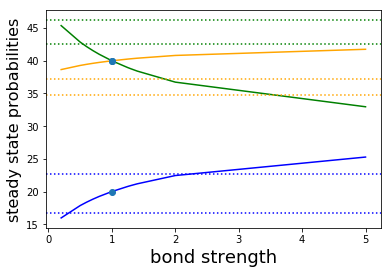

In [24]:
"tESTING HYPOTHESIS WITH all position, early state unimportant, end sate proportional to bond strengths"
#narrow observations array
alphas = [0.2, 0.5, 0.6, 0.7, 0.8, 1, 1.25, 1.3, 1.4, 2, 5]
x1 = []
x2 = []
x3 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    T_expected_narrow = np.asarray([[3+4*i, 5+2*i, 5+2*i, 4+3*i, 4+3*i],
     [3+4*i, 5+2*i, 5+2*i, 4+3*i, 4+3*i],
     [3+4*i, 5+2*i, 5+2*i, 4+3*i, 4+3*i],
     [3+4*i, 5+2*i, 5+2*i, 4+3*i, 4+3*i],
     [3+4*i, 5+2*i, 5+2*i, 4+3*i, 4+3*i]])
    T_eb = np.vstack([T_expected_narrow[0], 
                             (T_expected_narrow[1] + T_expected_narrow[2]) , 
                             (T_expected_narrow[3] + T_expected_narrow[4])])
    T_expected_broad = np.column_stack([T_eb[:, 0], 
                                 (T_eb[:, 1]+ T_eb[:, 2]), 
                                 (T_eb[:, 3]+ T_eb[:, 4])])
    T_expected_broad_norm  = np.vstack([T_expected_broad[0]/np.sum(T_expected_broad[0]), 
                                  T_expected_broad[1]/np.sum(T_expected_broad[1]), 
                                  T_expected_broad[2]/np.sum(T_expected_broad[2])])
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
    x3.append(evec_one[2])
plt.plot(alphas, x1, c = 'blue', ls = '-')
plt.plot(alphas, x2, c = 'green', ls = '-')
plt.plot(alphas, x3, c = 'orange', ls = '-')

plt.axhline(y=(22.7), c = 'blue', ls = ':')
plt.axhline(y=(42.6), c = 'green', ls = ':')
plt.axhline(y=(34.7), c = 'orange', ls = ':')
plt.axhline(y=(16.7), c = 'blue', ls = ':')
plt.axhline(y=(46.2), c = 'green', ls = ':')
plt.axhline(y=(37.2), c = 'orange', ls = ':')
plt.xlabel('bond strength', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1, 1),(20, 40, 40), 'o')

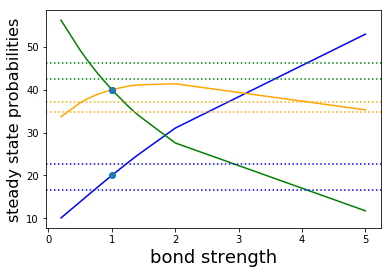

In [25]:
"tESTING HYPOTHESIS WITH 2 positions for particle to swing to (no swing back to old state)"
#narrow observations array
alphas = [0.2, 0.5, 0.6, 0.7, 0.8, 1, 1.25, 1.3, 1.4, 2, 5]
x1 = []
x2 = []
x3 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    T_expected_narrow = np.asarray([[2*i+2, 0, 0, 2, 2],
     [0, 0, 5+i, i+1, 0],
     [0, 5+i, 0, 0, i+1],
     [i+1, 2, 0, 0, 3+i],
     [i+1, 0, 2, 3+i, 0]])
    T_eb = np.vstack([T_expected_narrow[0], 
                             (T_expected_narrow[1] + T_expected_narrow[2]) , 
                             (T_expected_narrow[3] + T_expected_narrow[4])])
    T_expected_broad = np.column_stack([T_eb[:, 0], 
                                 (T_eb[:, 1]+ T_eb[:, 2]), 
                                 (T_eb[:, 3]+ T_eb[:, 4])])
    T_expected_broad_norm  = np.vstack([T_expected_broad[0]/np.sum(T_expected_broad[0]), 
                                  T_expected_broad[1]/np.sum(T_expected_broad[1]), 
                                  T_expected_broad[2]/np.sum(T_expected_broad[2])])
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
    x3.append(evec_one[2])
plt.plot(alphas, x1, c = 'blue', ls = '-')
plt.plot(alphas, x2, c = 'green', ls = '-')
plt.plot(alphas, x3, c = 'orange', ls = '-')

plt.axhline(y=(22.7), c = 'blue', ls = ':')
plt.axhline(y=(42.6), c = 'green', ls = ':')
plt.axhline(y=(34.7), c = 'orange', ls = ':')
plt.axhline(y=(16.7), c = 'blue', ls = ':')
plt.axhline(y=(46.2), c = 'green', ls = ':')
plt.axhline(y=(37.2), c = 'orange', ls = ':')
plt.xlabel('bond strength', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1, 1),(20, 40, 40), 'o')

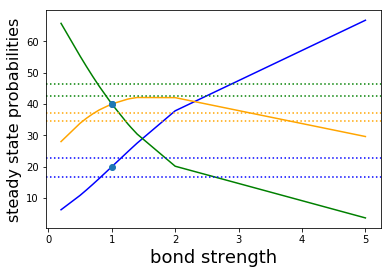

In [26]:
"tESTING HYPOTHESIS WITH 2 positions for particle to swing to (no swing back to old state), and original state matters"
#narrow observations array
alphas = [0.2, 0.5, 0.6, 0.7, 0.8, 1, 1.25, 1.3, 1.4, 2, 5]
x1 = []
x2 = []
x3 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    T_expected_narrow = np.asarray([[2, 0, 0, 2/(1+i), 2/(1+i)],
     [0, 0, 3, (1+i)/2, 0],
     [0, 3, 0, 0, (1+i)/2],
     [(1+i)/2, 2/(1+i), 0, 0, 2],
     [(1+i)/2, 0, 2/(1+i),2, 0]])
    T_eb = np.vstack([T_expected_narrow[0], 
                             (T_expected_narrow[1] + T_expected_narrow[2]) , 
                             (T_expected_narrow[3] + T_expected_narrow[4])])
    T_expected_broad = np.column_stack([T_eb[:, 0], 
                                 (T_eb[:, 1]+ T_eb[:, 2]), 
                                 (T_eb[:, 3]+ T_eb[:, 4])])
    T_expected_broad_norm  = np.vstack([T_expected_broad[0]/np.sum(T_expected_broad[0]), 
                                  T_expected_broad[1]/np.sum(T_expected_broad[1]), 
                                  T_expected_broad[2]/np.sum(T_expected_broad[2])])
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
    x3.append(evec_one[2])
plt.plot(alphas, x1, c = 'blue', ls = '-')
plt.plot(alphas, x2, c = 'green', ls = '-')
plt.plot(alphas, x3, c = 'orange', ls = '-')

plt.axhline(y=(22.7), c = 'blue', ls = ':')
plt.axhline(y=(42.6), c = 'green', ls = ':')
plt.axhline(y=(34.7), c = 'orange', ls = ':')
plt.axhline(y=(16.7), c = 'blue', ls = ':')
plt.axhline(y=(46.2), c = 'green', ls = ':')
plt.axhline(y=(37.2), c = 'orange', ls = ':')
plt.xlabel('bond strength', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1, 1),(20, 40, 40), 'o')

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


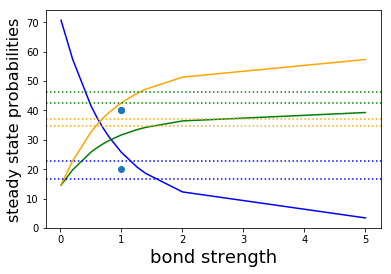

In [27]:
"tESTING HYPOTHESIS WITH break apart and bond strengths (no swing back to old state), and original state matters"
#narrow observations array
alphas = [0.01, 0.2, 0.5, 0.6, 0.7, 0.8, 1, 1.25, 1.3, 1.4, 2, 5]
x1 = []
x2 = []
x3 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    T_expected_narrow = np.asarray([[i*(i/8 + 20/9)/(90), i*(1+i)*(3*i + 4/3)/(5*18*6), i*(1+i)*(3*i + 4/3)/(5*18*6), i*(1+i)*(3*i / 4 + 2 / 9)/(5*18), i*(1+i)*(3*i / 4 + 2 / 9)/(5*18)],
     [i*(i/8 + 20/9)/(90), i*(1+i)*(3*i + 4/3)/(5*18*6), i*(1+i)*(3*i + 4/3)/(5*18*6), i*(1+i)*(3*i / 4 + 2 / 9)/(5*18), i*(1+i)*(3*i / 4 + 2 / 9)/(5*18)],
     [i*(i/8 + 20/9)/(90), i*(1+i)*(3*i + 4/3)/(5*18*6), i*(1+i)*(3*i + 4/3)/(5*18*6), i*(1+i)*(3*i / 4 + 2 / 9)/(5*18), i*(1+i)*(3*i / 4 + 2 / 9)/(5*18)],
     [i*(i/8 + 20/9)/(90), i*(1+i)*(3*i + 4/3)/(5*18*6), i*(1+i)*(3*i + 4/3)/(5*18*6), i*(1+i)*(3*i / 4 + 2 / 9)/(5*18), i*(1+i)*(3*i / 4 + 2 / 9)/(5*18)],
     [i*(i/8 + 20/9)/(90), i*(1+i)*(3*i + 4/3)/(5*18*6), i*(1+i)*(3*i + 4/3)/(5*18*6), i*(1+i)*(3*i / 4 + 2 / 9)/(5*18), i*(1+i)*(3*i / 4 + 2 / 9)/(5*18)]])
    T_eb = np.vstack([T_expected_narrow[0], 
                             (T_expected_narrow[1] + T_expected_narrow[2]) , 
                             (T_expected_narrow[3] + T_expected_narrow[4])])
    T_expected_broad = np.column_stack([T_eb[:, 0], 
                                 (T_eb[:, 1]+ T_eb[:, 2]), 
                                 (T_eb[:, 3]+ T_eb[:, 4])])
    T_expected_broad_norm  = np.vstack([T_expected_broad[0]/np.sum(T_expected_broad[0]), 
                                  T_expected_broad[1]/np.sum(T_expected_broad[1]), 
                                  T_expected_broad[2]/np.sum(T_expected_broad[2])])
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
    x3.append(evec_one[2])
plt.plot(alphas, x1, c = 'blue', ls = '-')
plt.plot(alphas, x2, c = 'green', ls = '-')
plt.plot(alphas, x3, c = 'orange', ls = '-')

plt.axhline(y=(22.7), c = 'blue', ls = ':')
plt.axhline(y=(42.6), c = 'green', ls = ':')
plt.axhline(y=(34.7), c = 'orange', ls = ':')
plt.axhline(y=(16.7), c = 'blue', ls = ':')
plt.axhline(y=(46.2), c = 'green', ls = ':')
plt.axhline(y=(37.2), c = 'orange', ls = ':')
plt.xlabel('bond strength', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1, 1),(20, 40, 40), 'o')

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:90: ComplexWarning: Casting complex values to real discards the imaginary part
c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:154: ComplexWarning: Casting complex values to real discards the imaginary part


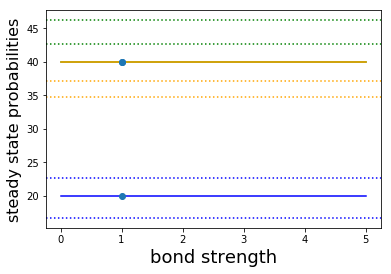

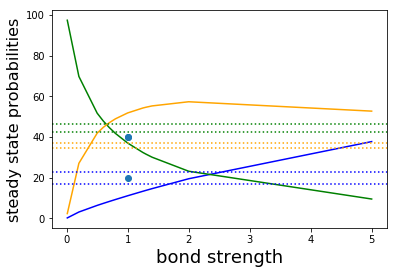

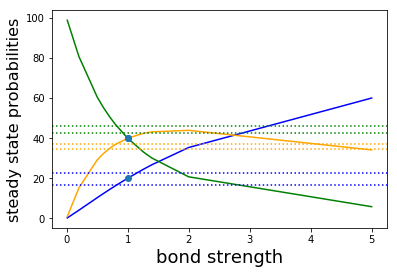

In [31]:
"tESTING HYPOTHESIS WITH break apart and pruple weights"
#narrow observations array
fig, ax = plt.subplots()
alphas = [0.01, 0.2, 0.5, 0.6, 0.7, 0.8, 1, 1.25, 1.3, 1.4, 2, 5]
x1 = []
x2 = []
x3 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    t_pels = np.array([4, 8, 6,2, 4 ])/120
    b_pels = np.array([4, 12, 6, 2])/120
    bm_pels = np.array([16, 8])/120
    bm =  sum(bm_pels)
    br = bl = sum(b_pels)
    tr = tl = sum(t_pels)
    T_expected_narrow = np.asarray([[bm, br, bl, tr, tl],
     [bm, br, bl, tr, tl],
     [bm, br, bl, tr, tl],
     [bm, br, bl, tr, tl],
     [bm, br, bl, tr, tl]])
    T_eb = np.vstack([T_expected_narrow[0], 
                             (T_expected_narrow[1] + T_expected_narrow[2]) , 
                             (T_expected_narrow[3] + T_expected_narrow[4])])
    T_expected_broad = np.column_stack([T_eb[:, 0], 
                                 (T_eb[:, 1]+ T_eb[:, 2]), 
                                 (T_eb[:, 3]+ T_eb[:, 4])])
    T_expected_broad_norm  = np.vstack([T_expected_broad[0]/np.sum(T_expected_broad[0]), 
                                  T_expected_broad[1]/np.sum(T_expected_broad[1]), 
                                  T_expected_broad[2]/np.sum(T_expected_broad[2])])
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
    x3.append(evec_one[2])
plt.plot(alphas, x1, c = 'blue', ls = '-')
plt.plot(alphas, x2, c = 'green', ls = '-')
plt.plot(alphas, x3, c = 'orange', ls = '-')

plt.axhline(y=(22.7), c = 'blue', ls = ':')
plt.axhline(y=(42.6), c = 'green', ls = ':')
plt.axhline(y=(34.7), c = 'orange', ls = ':')
plt.axhline(y=(16.7), c = 'blue', ls = ':')
plt.axhline(y=(46.2), c = 'green', ls = ':')
plt.axhline(y=(37.2), c = 'orange', ls = ':')
plt.xlabel('bond strength', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1, 1),(20, 40, 40), 'o')


"tESTING HYPOTHESIS WITH break apart and green weights"
#narrow observations array
fig, ax = plt.subplots()
alphas = [0.01, 0.2, 0.5, 0.6, 0.7, 0.8, 1, 1.25, 1.3, 1.4, 2, 5]
x1 = []
x2 = []
x3 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    bm_gels = np.array([1, 2/(2+2*i)])*(1+i)*i/((6+2*i)*(3+i))
    b_gels = np.array([1/((3+i)*(6+2*i)), 2/((8*i)*(2+2*i)**2), 2/((6+2*i)*(2+2*i)**2), 2/((2+2*i)*(3+i)*(6+2*i))])*4*i/(i+1)
    t_gels = np.array([2/(3+i), 2/(3+i), 4/((2+2*i)**2), 4/((2+2*i)*(3+i)), 4/((2+2*i)*(3+i))])*i/(6+2*i)
    bm =  sum(bm_gels)
    br = bl = sum(b_gels)
    tr = tl = sum(t_gels)
    T_expected_narrow = np.asarray([[bm, br, bl, tr, tl],
     [bm, br, bl, tr, tl],
     [bm, br, bl, tr, tl],
     [bm, br, bl, tr, tl],
     [bm, br, bl, tr, tl]])
    T_eb = np.vstack([T_expected_narrow[0], 
                             (T_expected_narrow[1] + T_expected_narrow[2]) , 
                             (T_expected_narrow[3] + T_expected_narrow[4])])
    T_expected_broad = np.column_stack([T_eb[:, 0], 
                                 (T_eb[:, 1]+ T_eb[:, 2]), 
                                 (T_eb[:, 3]+ T_eb[:, 4])])
    T_expected_broad_norm  = np.vstack([T_expected_broad[0]/np.sum(T_expected_broad[0]), 
                                  T_expected_broad[1]/np.sum(T_expected_broad[1]), 
                                  T_expected_broad[2]/np.sum(T_expected_broad[2])])
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
    x3.append(evec_one[2])
plt.plot(alphas, x1, c = 'blue', ls = '-')
plt.plot(alphas, x2, c = 'green', ls = '-')
plt.plot(alphas, x3, c = 'orange', ls = '-')

plt.axhline(y=(22.7), c = 'blue', ls = ':')
plt.axhline(y=(42.6), c = 'green', ls = ':')
plt.axhline(y=(34.7), c = 'orange', ls = ':')
plt.axhline(y=(16.7), c = 'blue', ls = ':')
plt.axhline(y=(46.2), c = 'green', ls = ':')
plt.axhline(y=(37.2), c = 'orange', ls = ':')
plt.xlabel('bond strength', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1, 1),(20, 40, 40), 'o')


"tESTING HYPOTHESIS WITH break apart and both weights"
#narrow observations array
fig, ax = plt.subplots()
alphas = [0.01, 0.2, 0.5, 0.6, 0.7, 0.8, 1, 1.25, 1.3, 1.4, 2, 5]
x1 = []
x2 = []
x3 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    #print(tm)
    bm = (2*2*i*2*(1+i)*(1+i)/((3+2*i)*(2*(i+1)+2)*(6+2*i))+
          2*3*2*i*2*(1+i)*(1+i)/((3+2*i)*(2*i+4)*(2*(1+i)+2)*(6+2*i)))
    #print(bm)
    br=bl = (2*i*2*2/((2*i+3)*(2*(1+i)+2)*(6+2*i))+
        2*3*4*2*2*i/((2*i+3)*(2*i+4)*(2+2*i)*8*i)+
        3*4*2*i*2/((3+2*i)*(4+2*i)*(2*i+2)*(6+2*i))+
        3*2*i*2*2/((2*i+3)*(4+2*i)*(2+2*(i+1))*(6+2*i)))
    tr=tl = (2*i*2*(1+i)/((2*i+3)*(2*(1+i)+2)*(6+2*i))+
        2*i*(1+i)*2*2/((2*i+3)*(2*(i+1)+2)*(6+2*i))+
        3*4*2*i*(1+i)/((3+2*i)*(4+2*i)*(2*i+2)*(6+2*i))+
        3*2*i*2*(i+1)*2/((2*i+3)*(4+2*i)*(2*(i+1)+2)*(6+2*i))+
        3*2*i*2*(1+i)/((2*i+3)*(4+2*i)*(2+2*(i+1))*(6+2*i)))
    T_expected_narrow = np.asarray([[bm, br, bl, tr, tl],
     [bm, br, bl, tr, tl],
     [bm, br, bl, tr, tl],
     [bm, br, bl, tr, tl],
     [bm, br, bl, tr, tl]])
    T_eb = np.vstack([T_expected_narrow[0], 
                             (T_expected_narrow[1] + T_expected_narrow[2]) , 
                             (T_expected_narrow[3] + T_expected_narrow[4])])
    T_expected_broad = np.column_stack([T_eb[:, 0], 
                                 (T_eb[:, 1]+ T_eb[:, 2]), 
                                 (T_eb[:, 3]+ T_eb[:, 4])])
    T_expected_broad_norm  = np.vstack([T_expected_broad[0]/np.sum(T_expected_broad[0]), 
                                  T_expected_broad[1]/np.sum(T_expected_broad[1]), 
                                  T_expected_broad[2]/np.sum(T_expected_broad[2])])
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
    x3.append(evec_one[2])
plt.plot(alphas, x1, c = 'blue', ls = '-')
plt.plot(alphas, x2, c = 'green', ls = '-')
plt.plot(alphas, x3, c = 'orange', ls = '-')

plt.axhline(y=(22.7), c = 'blue', ls = ':')
plt.axhline(y=(42.6), c = 'green', ls = ':')
plt.axhline(y=(34.7), c = 'orange', ls = ':')
plt.axhline(y=(16.7), c = 'blue', ls = ':')
plt.axhline(y=(46.2), c = 'green', ls = ':')
plt.axhline(y=(37.2), c = 'orange', ls = ':')
plt.xlabel('bond strength', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1, 1),(20, 40, 40), 'o')

In [ ]:
"I don't know where I got tis from, but it's here"
#broken transition matrix hypothesis array
T_obb = np.asarray([[3, 1., 2., 2., 3.],
 [3., 7., 6., 4., 2.],
 [2., 7., 9., 4., 3.],
 [5., 2., 4., 4., 4.],
 [4., 3., 3., 3., 5.]])
T_eb = np.vstack([T_obb[0], 
                             (T_obb[1] + T_obb[2]) , 
                             (T_obb[3] + T_obb[4])])
T_obb = np.column_stack([T_eb[:, 0], 
                             (T_eb[:, 1]+ T_eb[:, 2]), 
                             (T_eb[:, 3]+ T_eb[:, 4])])
T_obb_norm = np.vstack([T_obb[i]/np.sum(T_obb[i]) for i in range(len(T_obb))])
print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = np.around(eigvec_one*100 / np.sum(eigvec_one), 0)
print("Eigenvector for eigenvalue 1 of T_obb_norm:")
print(evec_one)

#sample initial distributions of states, given 50 steps to equalize to a stady state
reps = 50
trials = 6
for i in range(trials):
    x0 = np.random.random_integers(0, 10, 5) 
    x0 = x0*100/sum(x0)
    xs = np.zeros((len(x0), reps))
    xs[:,0] = x0
    ys = [0]
    T = T_expected_narrow
    for rep in range(1, reps):
        x_rep = T.dot(xs[:, rep-1])
        #print(x_rep)
        xs[:, rep] = x_rep
        ys.append(rep)
    #print(xs)
    fig, ax = plt.subplots()
    ax.plot(ys, xs[0],'.', ys, xs[1], '.', ys,xs[2],'.', ys,xs[3],'.', ys, xs[4], '.')


In [ ]:
"MATRICES FROM OTHER transition thresold runs"

In [ ]:
#T = 10
T_ob = np.asarray([[86., 14., 15., 30. ,32.],
 [39. ,75., 71. ,39., 21.],
 [23., 64., 90., 34., 33.],
 [49., 22. ,41., 46., 42.],
 [44., 29., 31., 35. ,55.]])
T_ob_norm = np.vstack([T_ob[i]/np.sum(T_ob[i]) for i in range(len(T_ob))])
print(T_ob, '\n', np.around(T_ob_norm, 2))
eigvals, eigvecs = np.linalg.eig(T_ob_norm.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = np.around(eigvec_one*100 / np.sum(eigvec_one), 0)
print("Eigenvector for eigenvalue 1 of T_ob_norm:")
print(evec_one)

In [ ]:
#T = 27
T_ob = np.asarray([[26.,  8., 11. ,16., 19.],
 [26., 38., 51., 33., 18.],
 [14. ,51., 42., 23., 24.],
 [23., 15. ,27. ,26., 30.],
 [18., 22. ,22., 26., 31.]])
T_ob_norm = np.vstack([T_ob[i]/np.sum(T_ob[i]) for i in range(len(T_ob))])
print(T_ob, '\n', np.around(T_ob_norm, 2))
eigvals, eigvecs = np.linalg.eig(T_ob_norm.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = np.around(eigvec_one*100 / np.sum(eigvec_one), 0)
print("Eigenvector for eigenvalue 1 of T_ob_norm:")
print(evec_one)

In [ ]:
#T=38
T_ob = np.asarray([[21. , 7. ,10. ,16. ,17.],
 [23. ,30., 40., 30. ,18.],
 [13., 40. ,31. ,21., 20.],
 [18. ,13. ,22., 23. ,25.],
 [14. ,18., 17., 16., 25.]])
T_ob_norm = np.vstack([T_ob[i]/np.sum(T_ob[i]) for i in range(len(T_ob))])
print(T_ob, '\n', np.around(T_ob_norm, 2))
eigvals, eigvecs = np.linalg.eig(T_ob_norm.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = np.around(eigvec_one*100 / np.sum(eigvec_one), 0)
print("Eigenvector for eigenvalue 1 of T_ob_norm:")
print(evec_one)

In [ ]:
#T=52
T_ob = np.asarray([[12. , 7.,  8. ,11., 15.],
 [20. ,20. ,27. ,27. ,12.],
 [11., 30. ,23., 18., 16.],
 [14., 12., 19., 18., 21.],
 [11., 17. ,14. ,15., 23.]])
T_ob_norm = np.vstack([T_ob[i]/np.sum(T_ob[i]) for i in range(len(T_ob))])
print(T_ob, '\n', np.around(T_ob_norm, 2))
eigvals, eigvecs = np.linalg.eig(T_ob_norm.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = np.around(eigvec_one*100 / np.sum(eigvec_one), 0)
print("Eigenvector for eigenvalue 1 of T_ob_norm:")
print(evec_one)

In [ ]:
#T=60
T_ob = np.asarray([[ 9. , 5. , 7. , 9., 13.],
 [19. ,19., 26. ,25., 12.],
 [11. ,26., 19., 17. ,13.],
 [11., 12. ,18., 16., 21.],
 [11., 17., 12. ,14. ,20.]])
T_ob_norm = np.vstack([T_ob[i]/np.sum(T_ob[i]) for i in range(len(T_ob))])
print(T_ob, '\n', np.around(T_ob_norm, 2))
eigvals, eigvecs = np.linalg.eig(T_ob_norm.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = np.around(eigvec_one*100 / np.sum(eigvec_one), 0)
print("Eigenvector for eigenvalue 1 of T_ob_norm:")
print(evec_one)